# THE KAGGLE TITANIC COMPETITION

This is a deep neural network with three layers built using numpy alone, and implementing the Adams optimization algorithm to increase back propagation.

The data is from the kaggle titanic competition to build a machine learning model that can learn and predict if an individual(input) on the ship survived or died (output,survived = 1, died = 0).

A training set was giving in csv format, and was extracted using pandas library. While the test set was also giving to calculate the accuracy of the model.

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('You uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving gender_submission.csv to gender_submission.csv
Saving test.csv to test.csv
Saving train.csv to train.csv
You uploaded file "gender_submission.csv" with length 3258 bytes
You uploaded file "test.csv" with length 28629 bytes
You uploaded file "train.csv" with length 61194 bytes


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import sklearn

In [ ]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
filt = df['Embarked'].str.contains('NaN',na=True)
df.loc[filt, 'Embarked']

61     NaN
829    NaN
Name: Embarked, dtype: object

In [ ]:
df.drop([61,829], axis=0, inplace=True)

In [ ]:
test_df = pd.read_csv('test.csv')
test_df.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [ ]:
solution = pd.read_csv('gender_submission.csv')
solution

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


Selected the passenger id, Pclass, sex of passenger, SibSp, Parch and Embarked as the features to build the model on. I made the passenger id as the index and used the survived column as output

In [ ]:
Xtrainfeatures = df[['PassengerId','Pclass','Sex','SibSp','Parch','Embarked']]
Xtrainfeatures.set_index('PassengerId', inplace=True)
Xtestfeatures = test_df[['PassengerId','Pclass','Sex','SibSp','Parch','Embarked']]
Xtestfeatures.set_index('PassengerId', inplace=True)
Ytrain = np.array(df['Survived']).reshape((-1,1))

In [ ]:
from sklearn import preprocessing
sex = preprocessing.LabelEncoder()
sex.fit(['male','female'])
Xtrainfeatures.loc[:,'Sex'] = sex.transform(Xtrainfeatures.loc[:,'Sex'])

embark = preprocessing.LabelEncoder()
embark.fit(['S','C','Q'])
Xtrainfeatures.loc[:,'Embarked'] = embark.transform(Xtrainfeatures.loc[:,'Embarked'])

testsex = preprocessing.LabelEncoder()
testsex.fit(['male','female'])
Xtestfeatures.loc[:,'Sex'] = testsex.transform(Xtestfeatures.loc[:,'Sex'])

testembark = preprocessing.LabelEncoder()
testembark.fit(['S','C','Q'])
Xtestfeatures.loc[:,'Embarked'] = testembark.transform(Xtestfeatures.loc[:,'Embarked'])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Converted the features into numerical values using scikit-learn preprocessing

In [ ]:
Xtestfeatures.head()

,Pclass,Sex,SibSp,Parch,Embarked
PassengerId,,,,,
892,3,1,0,0,1
893,3,0,1,0,2
894,2,1,0,0,1
895,3,1,0,0,2
896,3,0,1,1,2


In [ ]:
Xtrainfeatures.head()

,Pclass,Sex,SibSp,Parch,Embarked
PassengerId,,,,,
1,3,1,1,0,2
2,1,0,1,0,0
3,3,0,0,0,2
4,1,0,1,0,2
5,3,1,0,0,2


In [ ]:
Xtrain = np.asarray(Xtrainfeatures)
Xtest = np.asarray(Xtestfeatures)
Ytest = np.asarray(solution['Survived'])
print('X train shape is ', Xtrain.shape)
print('X test shape is ', Xtest.shape)
print('Y train shape is ', Ytrain.shape)

X train shape is  (889, 5)
X test shape is  (418, 5)
Y train shape is  (889, 1)


#### TRANSPOSING THE DATASETS

In [ ]:
Xtrain = Xtrain.T
Xtest  = Xtest.T
Ytrain = Ytrain.T
print('The shape of Xtrain is', Xtrain.shape)
print('The shape of Xtest is', Xtest.shape)
print('The shape of Ytrain is', Ytrain.shape)

The shape of Xtrain is (5, 889)
The shape of Xtest is (5, 418)
The shape of Ytrain is (1, 889)


In [ ]:
Ytest = Ytest.reshape((1,-1))
print('The shape of Ytest is', Ytest.shape)

The shape of Ytest is (1, 418)


## DEFINING THE DEEP-LEARNING FUNCTIONS

#### INTUITION FOR FORWARD PROPAGATION INCLUDING L2 REGULARIZATION

Defined the functions to randomly initialize the weight functions and set the biases to zero

In [ ]:
def initializing_params(layers):
    np.random.seed(3)
    L = len(layers)
    parameters = {}
    for l in range(1,L):
        parameters['W' + str(l)] = np.random.randn(layers[l],layers[l-1]) * 10
        parameters['b' + str(l)] = np.zeros((layers[l],1))
    return parameters

In [ ]:
def he_initialization(layers):
    np.random.seed(3)
    L = len(layers)
    parameters = {}
    for l in range(1,L):
        parameters['W' + str(l)] = np.random.randn(layers[l],layers[l-1]) * np.sqrt(2/layers[l-1])
        parameters['b' + str(l)] = np.zeros((layers[l],1))
    return parameters

In [ ]:
layers = [5,4,4,4,1]
parameters =  he_initialization(layers)

In [ ]:
L = len(layers)

for i in range(1,L):
    print("W{} = {}".format(i,parameters["W" + str(i)].shape))
    print("b{} = {}".format(i,parameters["b" + str(i)].shape))

W1 = (4, 5)
b1 = (4, 1)
W2 = (4, 4)
b2 = (4, 1)
W3 = (4, 4)
b3 = (4, 1)
W4 = (1, 4)
b4 = (1, 1)


Then we defined the sigmoid function, relu function, cost function, the L2 regularization function, the regularized cost function and the forward propagation

In [ ]:
def sigmoid(x):
    a = 1/(1 + np.exp(-x))
    return a

def relu(x):
    a = np.maximum(x,0)
    return a

def cost(a,y):
    m = a.shape[1]
    loss = (y * np.log(a)) + ((1-y) * np.log(1-a))
    J = -(1/m) * np.sum(loss)
    return J

def L2_regularization(parameters, m, lambd=0.7):
    reg =0
    for i in range(1,L):
        reg += np.sum(np.square(parameters['W' + str(i)]))
    reg = (lambd/(2*m)) * reg
    return reg

def regularized_cost(a,y):
    m = a.shape[1]
    J = cost(a,y) + L2_regularization(parameters, m, lambd=0.7)
    return J

def forward_propagation(X, parameters, L):
    Z = {}
    A = {}
    A['0'] = X
    for i in range(1, L):
        Z[str(i)] = np.dot(parameters['W' + str(i)], A[str(i-1)]) + parameters['b' + str(i)]
        if i == (L-1):
            A[str(i)] = sigmoid(Z[str(i)])
            continue
        A[str(i)] = relu(Z[str(i)])
    return Z, A

# INTUITION FOR BACK-PROPAGATION INCLUDING L2 REGULARIZATION

In [ ]:
def relu_derivative(x):
    x[x<0] = 0
    x[x>0] = 1
    return x

In [ ]:
def sigmoid_derivative(x):
    g = sigmoid(x) * (1 - sigmoid(x))
    return g

In [ ]:
def back_propagation(A,Z,parameters,Y, L,lambd=0, regularization = False):
    m = Y.shape[1]
    dA = {}
    dZ = {}
    dw = {}
    db = {}
    dZ[str(L-1)] = A[str(L-1)] - Y

    for i in range(L-1, 0, -1):
        dw[str(i)] = (1/m) * np.dot(dZ[str(i)], A[str(i-1)].T)
        if regularization is True:
            dw[str(i)] = (1/m) * np.dot(dZ[str(i)], A[str(i-1)].T) + (lambd/m) * parameters['W' + str(i)]
        db[str(i)] = (1/m) * np.sum(dZ[str(i)], axis=1, keepdims=True)
        if i != 1:
            dA[str(i-1)] = np.dot(parameters['W' + str(i)].T, dZ[str(i)])
            dZ[str(i-1)] = np.multiply(dA[str(i-1)], np.int64(A[str(i-1)] > 0))
    return dw, db

In [ ]:
def update_params(parameters, dw, db, alpha, layers):
    L = len(layers)
    for i in range(1,L):
        parameters['W' + str(i)] = parameters['W' + str(i)] - alpha * dw[str(i)]
        parameters['b' + str(i)] = parameters['b' + str(i)] - alpha * db[str(i)]
    return parameters

# PUTTING ALL TOGETHER

In [ ]:
def deep_learning_model(X,Y, layers, learning_rate = 0.01, num_iterations = 15000, n = 1000):
    Jlist =[]
    m = X.shape[1]
    L = len(layers)
    parameters = he_initialization(layers)
    for i in range(1,num_iterations + 1):
        Z, A = forward_propagation(X, parameters, L)
        J = cost(A[str(L-1)], Y)
        Jlist.append(J)
        if i % n == 0:
            print("The cost after the {} iteration is {}".format(i, J))
        dw, db = back_propagation(A,Z,parameters,Y, L)
        parameters = update_params(parameters, dw, db, learning_rate, layers)
    return parameters, Jlist, A

Another function is written to include regularization for the deep learning model.

In [ ]:
def regularized_deep_model(X,Y,layers,learning_rate = 0.01,lambd = 0.7, num_iterations = 15000, n=1000):
    Jlist =[]
    m = X.shape[1]
    L = len(layers)
    parameters = he_initialization(layers)
    for i in range(1,num_iterations + 1):
        Z, A = forward_propagation(X, parameters, L)
        J = regularized_cost(A[str(L-1)], Y)
        Jlist.append(J)
        if i % n == 0:
            print("The cost after the {} iteration is {}".format(i, J))
        dw, db = back_propagation(A,Z,parameters,Y, L,lambd, regularization = True)
        parameters = update_params(parameters, dw, db, learning_rate, layers)
    return parameters, Jlist, A

Defining the functions for prediction or final output of the model after learning

In [ ]:
def prediction(x):
    yhat = (x>=0.5).astype(int)
    return yhat

def predict(X,parameters,L):
    Z, A = forward_propagation(X, parameters, L)
    yhat = prediction(A[str(L-1)])
    return yhat

# TRAINING A MODEL WITHOUT REGULARIZATION

In [ ]:
layers = [5, 25, 15, 1]
L = len(layers)
parameters, Jcost, A = deep_learning_model(Xtrain,Ytrain, layers, learning_rate = 0.01, num_iterations = 15000, n = 1000)

The cost after the 1000 iteration is 0.47490734278527014
The cost after the 2000 iteration is 0.4506865883674413
The cost after the 3000 iteration is 0.4430545380634535
The cost after the 4000 iteration is 0.43930212217743775
The cost after the 5000 iteration is 0.43671522318604383
The cost after the 6000 iteration is 0.434662864799621
The cost after the 7000 iteration is 0.43262125015474734
The cost after the 8000 iteration is 0.4306473315822492
The cost after the 9000 iteration is 0.42878876490545054
The cost after the 10000 iteration is 0.4270083033108079
The cost after the 11000 iteration is 0.4254843386294545
The cost after the 12000 iteration is 0.42411470183225136
The cost after the 13000 iteration is 0.422862718310043
The cost after the 14000 iteration is 0.4214059988282834
The cost after the 15000 iteration is 0.420026931769011


Plotting the cost values against the number of iterations to check for bias or variance problems

In [ ]:
J = pd.DataFrame(Jcost)
J

,0
0,0.665236
1,0.663167
2,0.661121
3,0.659050
4,0.657033
...,...
14995,0.420032
14996,0.420031
14997,0.420030
14998,0.420028


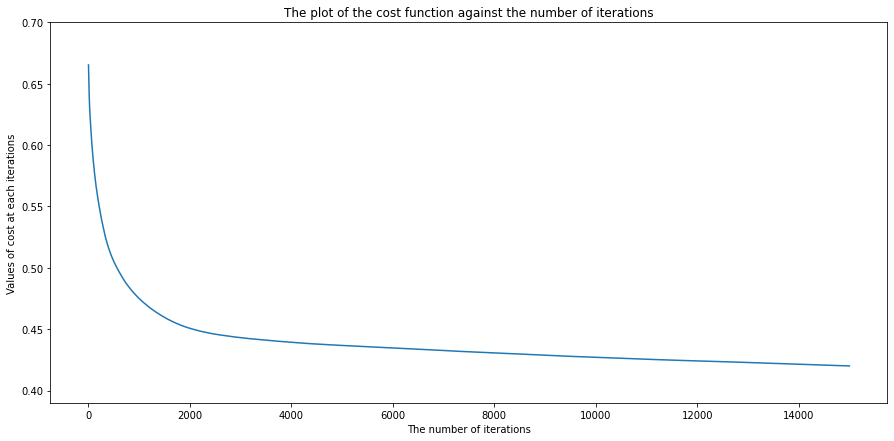

In [ ]:
plt.figure(figsize = (15,7))
J[0].plot(kind='line')
plt.ylim(0.39,0.7)
plt.xlabel('The number of iterations')
plt.ylabel('Values of cost at each iterations')
plt.title('The plot of the cost function against the number of iterations')
plt.show()

Checking the prediction of the model, we have that

In [ ]:
yhat = predict(Xtest, parameters, L)

Confusion matrix, without normalization
[[142  10]
 [ 17 249]]


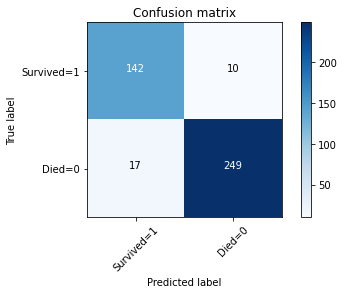

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cnf_matrix = confusion_matrix(Ytest.reshape((418,1)), yhat.reshape((418,1)), labels=[1,0])
np.set_printoptions(precision=2)


 # Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Survived=1','Died=0'],normalize= False,  title='Confusion matrix')

In [ ]:
precision = cnf_matrix[0][0] / (cnf_matrix[0][0] + cnf_matrix[0][1])
recall = cnf_matrix[0][0] / (cnf_matrix[0][0] + cnf_matrix[1][0])

F1score = (2 * precision * recall) / (precision + recall)

print('The precision of the model is {}'.format(precision))
print('The recall of the model is {}'.format(recall))
print('The F1-Score of the model is {}'.format(F1score))

The precision of the model is 0.9342105263157895
The recall of the model is 0.8930817610062893
The F1-Score of the model is 0.9131832797427653


The Model predicted 10 false positives and 17 false negatives, next we calculate f1-score of 0.91, implying that the model has an accuracy of 91%

# TRAINING THE MODEL WITH L2 REGULARIZATION

In [ ]:
layers = [5, 25, 15, 1]
L = len(layers)
parameters, Jcost, A = regularized_deep_model(Xtrain,Ytrain,layers,learning_rate = 0.01,lambd = 0.7, num_iterations = 15000, n=1000)

The cost after the 1000 iteration is 0.5129725244067251
The cost after the 2000 iteration is 0.48884793821626527
The cost after the 3000 iteration is 0.4812062389294091
The cost after the 4000 iteration is 0.47765401375361716
The cost after the 5000 iteration is 0.4751044248645714
The cost after the 6000 iteration is 0.473255241984321
The cost after the 7000 iteration is 0.4714848587825572
The cost after the 8000 iteration is 0.4700727282833541
The cost after the 9000 iteration is 0.46854028161414535
The cost after the 10000 iteration is 0.46684619163156743
The cost after the 11000 iteration is 0.4655096524404284
The cost after the 12000 iteration is 0.46425335243576876
The cost after the 13000 iteration is 0.46299593821484997
The cost after the 14000 iteration is 0.4617843348399145
The cost after the 15000 iteration is 0.4605004534989407


Plotting the cost function, we have that

In [ ]:
J = pd.DataFrame(Jcost)
J

,0
0,0.702900
1,0.700830
2,0.698781
3,0.696708
4,0.694690
...,...
14995,0.460505
14996,0.460504
14997,0.460502
14998,0.460501


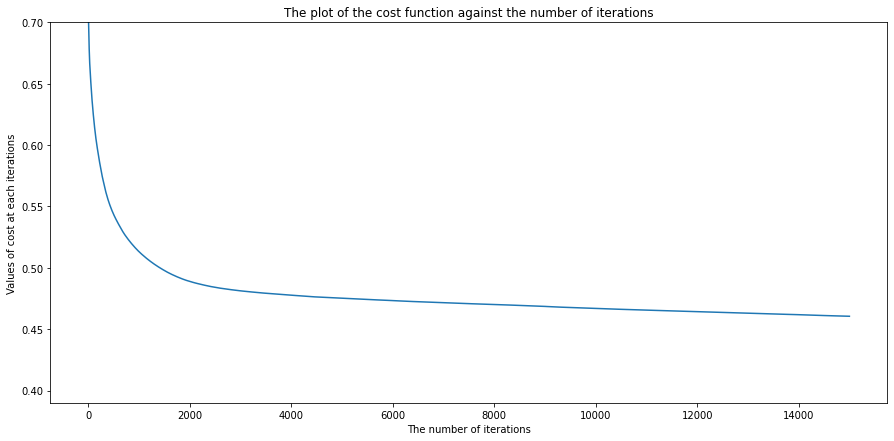

In [ ]:
plt.figure(figsize = (15,7))
J[0].plot(kind='line')
plt.ylim(0.39,0.7)
plt.xlabel('The number of iterations')
plt.ylabel('Values of cost at each iterations')
plt.title('The plot of the cost function against the number of iterations')
plt.show()

Visualizing the predictions of the model and calculating the output, we have that

In [ ]:
yhat = predict(Xtest, parameters, L)

Confusion matrix, without normalization
[[145   7]
 [ 17 249]]


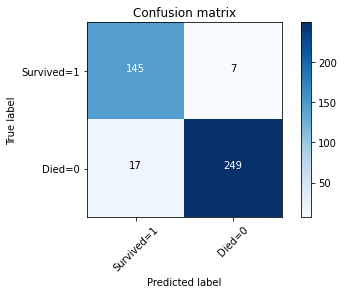

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cnf_matrix = confusion_matrix(Ytest.reshape((418,1)), yhat.reshape((418,1)), labels=[1,0])
np.set_printoptions(precision=2)


 # Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Survived=1','Died=0'],normalize= False,  title='Confusion matrix')

In [ ]:
precision = cnf_matrix[0][0] / (cnf_matrix[0][0] + cnf_matrix[0][1])
recall = cnf_matrix[0][0] / (cnf_matrix[0][0] + cnf_matrix[1][0])

F1score = (2 * precision * recall) / (precision + recall)

print('The precision of the model is {}'.format(precision))
print('The recall of the model is {}'.format(recall))
print('The F1-Score of the model is {}'.format(F1score))

The precision of the model is 0.9539473684210527
The recall of the model is 0.8950617283950617
The F1-Score of the model is 0.9235668789808917


Using L2 regularization, the false positives reduced to 7 while the false negatives was still at 17. In all, regularization improved the model to 92% accuracy

# TRAINING THE MODEL WITH DROPOUT REGULARIZATION

First we define the underlying functions for the dropout

In [ ]:
def dropout_forward_prop(X, parameters, L, keep_prob = 0.8):
    Z = {}
    A = {}
    A['0'] = X
    D = {}
    for i in range(1, L):
        Z[str(i)] = np.dot(parameters['W' + str(i)], A[str(i-1)]) + parameters['b' + str(i)]
        if i == (L-1):
            A[str(i)] = sigmoid(Z[str(i)])
            continue
        A[str(i)] = relu(Z[str(i)])
    for i in range(1, L-1):
        D[str(i)] = np.random.rand(A[str(i)].shape[0], A[str(i)].shape[1])
        D[str(i)] = (D[str(i)] < keep_prob).astype(int)
        A[str(i)] = np.multiply(A[str(i)], D[str(i)])
        A[str(i)] = np.divide(A[str(i)], keep_prob)
    return Z, A, D

In [ ]:
def dropout_back_prop(A,Z,D,parameters,Y, L, keep_prob=0.8):
    m = Y.shape[1]
    dA = {}
    dZ = {}
    dw = {}
    db = {}
    dZ[str(L-1)] = A[str(L-1)] - Y
    dw[str(L-1)] = (1/m) * np.dot(dZ[str(L-1)], A[str(L-2)].T)
    db[str(L-1)] = (1/m) * np.sum(dZ[str(L-1)], axis=1, keepdims=True)

    for i in range(L-2, 0, -1):
        dA[str(i)] = np.dot(parameters['W' + str(i+1)].T, dZ[str(i+1)])
        dA[str(i)] = np.multiply(dA[str(i)], D[str(i)])
        dA[str(i)] = np.divide(dA[str(i)], keep_prob)
        dZ[str(i)] = np.multiply(dA[str(i)], np.int64(A[str(i)] > 0))
        dw[str(i)] = (1/m) * np.dot(dZ[str(i)], A[str(i-1)].T)
        db[str(i)] = (1/m) * np.sum(dZ[str(i)], axis=1, keepdims=True)

    return dw, db

Putting all together

In [ ]:
def dropout_deep_learning_model(X,Y, layers, learning_rate = 0.01, keep_prob = 0.8, num_iterations = 15000, n = 1000):
    Jlist =[]
    m = X.shape[1]
    L = len(layers)
    parameters = he_initialization(layers)
    for i in range(1,num_iterations + 1):
        Z, A, D = dropout_forward_prop(X, parameters, L, keep_prob)
        J = cost(A[str(L-1)], Y)
        Jlist.append(J)
        if i % n == 0:
            print("The cost after the {} iteration is {}".format(i, J))
        dw, db = dropout_back_prop(A,Z,D,parameters,Y, L, keep_prob)
        parameters = update_params(parameters, dw, db, learning_rate, layers)
    return parameters, Jlist, A

### Building the Neural Network Using Dropout Regularization

In [ ]:
layers = [5,25,15,1]
L = len(layers)
parameters, Jcost, A = dropout_deep_learning_model(Xtrain,Ytrain,layers,learning_rate=0.001,keep_prob=0.5,num_iterations=15000,n=1000)
J= pd.DataFrame(Jcost)
J

The cost after the 1000 iteration is 0.5845332441347533
The cost after the 2000 iteration is 0.5518338721274963
The cost after the 3000 iteration is 0.5306531368248407
The cost after the 4000 iteration is 0.5153659272986445
The cost after the 5000 iteration is 0.5047253485364434
The cost after the 6000 iteration is 0.4967145918733008
The cost after the 7000 iteration is 0.4896210923385072
The cost after the 8000 iteration is 0.4839033530029451
The cost after the 9000 iteration is 0.4790356104047696
The cost after the 10000 iteration is 0.474724834651527
The cost after the 11000 iteration is 0.4709639805822951
The cost after the 12000 iteration is 0.46766847185602867
The cost after the 13000 iteration is 0.46464711611741993
The cost after the 14000 iteration is 0.46197145102663395
The cost after the 15000 iteration is 0.45945232023190413


,0
0,0.665236
1,0.665036
2,0.664828
3,0.664608
4,0.664416
...,...
14995,0.459461
14996,0.459460
14997,0.459459
14998,0.459455


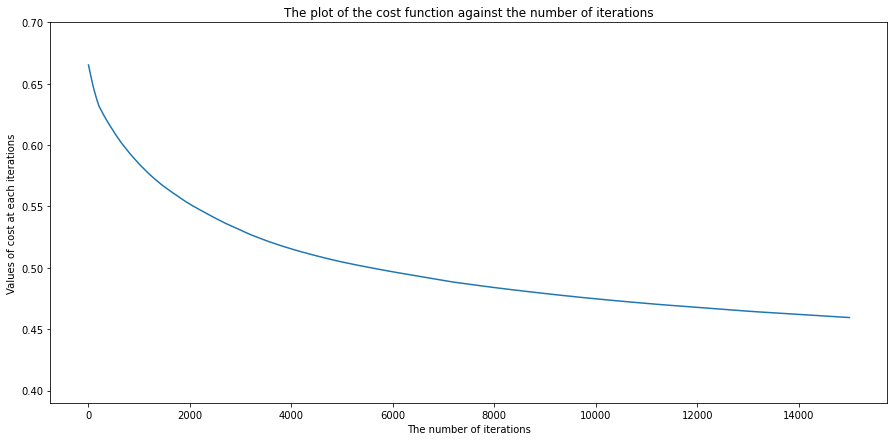

In [ ]:
plt.figure(figsize = (15,7))
J[0].plot(kind='line')
plt.ylim(0.39,0.7)
plt.xlabel('The number of iterations')
plt.ylabel('Values of cost at each iterations')
plt.title('The plot of the cost function against the number of iterations')
plt.show()

Confusion matrix, without normalization
[[146   6]
 [  0 266]]


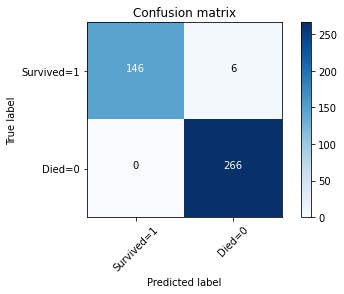

In [ ]:
yhat = predict(Xtest, parameters, L)


from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cnf_matrix = confusion_matrix(Ytest.reshape((418,1)), yhat.reshape((418,1)), labels=[1,0])
np.set_printoptions(precision=2)


 # Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Survived=1','Died=0'],normalize= False,  title='Confusion matrix')

In [ ]:
precision = cnf_matrix[0][0] / (cnf_matrix[0][0] + cnf_matrix[0][1])
recall = cnf_matrix[0][0] / (cnf_matrix[0][0] + cnf_matrix[1][0])

F1score = (2 * precision * recall) / (precision + recall)

print('The precision of the model is {}'.format(precision))
print('The recall of the model is {}'.format(recall))
print('The F1-Score of the model is {}'.format(F1score))

The precision of the model is 0.9605263157894737
The recall of the model is 1.0
The F1-Score of the model is 0.9798657718120806


Using Dropout regularization, the false positives reduced to 6 while the false negatives reduced drastically to 0. Finally, dropout regularization improved the model to 97.9% accuracy

In [ ]:
KaggleSolution = pd.DataFrame(yhat.reshape((-1,1)), columns=["Survived"])
KaggleSolution

,Survived
0,0
1,1
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [ ]:
KaggleSolution['PassengerId'] = solution['PassengerId']

In [ ]:
KaggleSolution.set_index('PassengerId', inplace = True)

In [ ]:
KaggleSolution

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [ ]:
KaggleSolution.to_csv('Oduola_Dropout_Model_Prediction.csv')

# TRAINING THE MODEL WITH ADAMS OPTIMIZATION ALGORITHM


Just like the dropout, the underlying functions for the Adams optimizations technique are written using only numpy

In [ ]:
#Function for initializing the parameters for the Adams optimization
def adam_init(parameters, L):
    Vdw = {}; Vdb = {}; Sdw = {}; Sdb = {}
    for l in range(1,L):
        Vdw[str(l)] = np.zeros((parameters["W" + str(l)].shape[0], parameters["W" + str(l)].shape[1]))
        Vdb[str(l)] = np.zeros((parameters["b" + str(l)].shape[0], parameters["b" + str(l)].shape[1]))
        Sdw[str(l)] = np.zeros((parameters["W" + str(l)].shape[0], parameters["W" + str(l)].shape[1]))
        Sdb[str(l)] = np.zeros((parameters["b" + str(l)].shape[0], parameters["b" + str(l)].shape[1]))
    return Vdw, Vdb, Sdw, Sdb

In [ ]:
def adam(parameters, dw, db, L, learning_rate = 0.01, t = 1, beta1 = 0.9, beta2 = 0.999, epsilon = 1e-7):
    Vdw, Vdb, Sdw, Sdb = adam_init(parameters, L)
    for l in range(1,L):
        Vdw[str(l)] = np.multiply(beta1, Vdw[str(l)]) + np.multiply(1-beta1, dw[str(l)])
        Vdb[str(l)] = np.multiply(beta1, Vdb[str(l)]) + np.multiply(1-beta1, db[str(l)])
        Sdw[str(l)] = np.multiply(beta2, Sdw[str(l)]) + np.multiply(1-beta2, np.power(dw[str(l)],2))
        Sdb[str(l)] = np.multiply(beta2, Sdb[str(l)]) + np.multiply(1-beta2, np.power(db[str(l)],2))
        Vdw_corrected = Vdw[str(l)] / (1 - np.power(beta1,t))
        Vdb_corrected = Vdb[str(l)] / (1 - np.power(beta1,t))
        Sdw_corrected = Sdw[str(l)] / (1 - np.power(beta2,t))
        Sdb_corrected = Sdb[str(l)] / (1 - np.power(beta2,t))
        update_w = np.divide(Vdw_corrected, np.sqrt(Sdw_corrected) + epsilon)
        update_b = np.divide(Vdb_corrected, np.sqrt(Sdb_corrected) + epsilon)
        parameters["W" + str(l)] = parameters["W" + str(l)] - np.multiply(learning_rate, update_w)
        parameters["b" + str(l)] = parameters["b" + str(l)] - np.multiply(learning_rate, update_b)
    return parameters

#### Putting all together

In [ ]:
def adam_deep_model(X,Y, layers, learning_rate = 0.01, num_iterations = 15000, n = 1000):
    Jlist =[]
    m = X.shape[1]
    L = len(layers)
    parameters = he_initialization(layers)
    for i in range(1,num_iterations + 1):
        Z, A = forward_propagation(X, parameters, L)
        J = cost(A[str(L-1)], Y)
        Jlist.append(J)
        if i % n == 0:
            print("The cost after the {} iteration is {}".format(i, J))
        dw, db = back_propagation(A,Z,parameters,Y, L)
        parameters = adam(parameters, dw, db, L, learning_rate)

    return parameters, Jlist, A

In [ ]:
def adam_dropout_model(X,Y, layers, learning_rate = 0.01, keep_prob = 0.8, num_iterations = 15000, n = 1000):
    Jlist =[]
    m = X.shape[1]
    L = len(layers)
    parameters = he_initialization(layers)
    for i in range(1,num_iterations + 1):
        Z, A, D = dropout_forward_prop(X, parameters, L, keep_prob)
        J = cost(A[str(L-1)], Y)
        Jlist.append(J)
        if i % n == 0:
            print("The cost after the {} iteration is {}".format(i, J))
        dw, db = dropout_back_prop(A,Z,D,parameters,Y, L, keep_prob)
        parameters = adam(parameters, dw, db, L, learning_rate)
    return parameters, Jlist, A

Training the model

In [ ]:
layerinput = [5, 25, 15, 1]
L = len(layerinput)
parameters, Jcost, A = adam_dropout_model(Xtrain,Ytrain, layerinput, learning_rate = 0.0001, keep_prob = 0.5, num_iterations = 5000, n=1000)
J= pd.DataFrame(Jcost)
J

The cost after the 1000 iteration is 0.5071958343313926
The cost after the 2000 iteration is 0.4719160024369072
The cost after the 3000 iteration is 0.45379030499820155
The cost after the 4000 iteration is 0.4438648066862683
The cost after the 5000 iteration is 0.4372354362642668


,0
0,0.665236
1,0.664819
2,0.664380
3,0.663940
4,0.663494
...,...
4995,0.437255
4996,0.437248
4997,0.437235
4998,0.437234


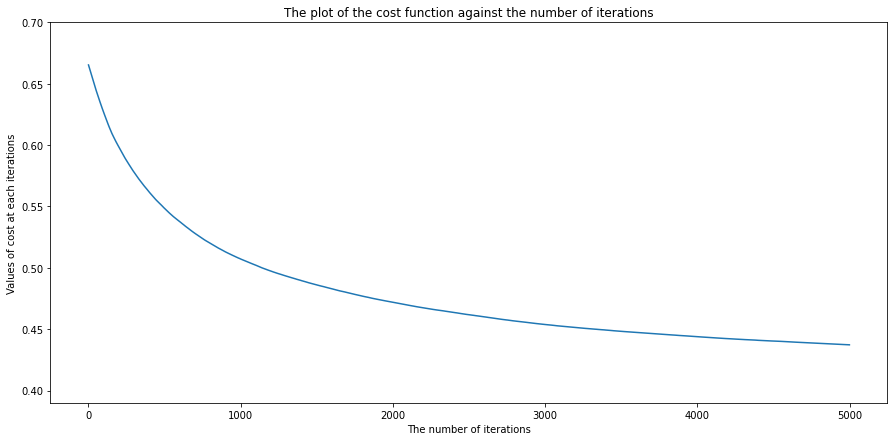

In [ ]:
plt.figure(figsize = (15,7))
J[0].plot(kind='line')
plt.ylim(0.39,0.7)
plt.xlabel('The number of iterations')
plt.ylabel('Values of cost at each iterations')
plt.title('The plot of the cost function against the number of iterations')
plt.show()

Confusion matrix, without normalization
[[147   5]
 [  7 259]]


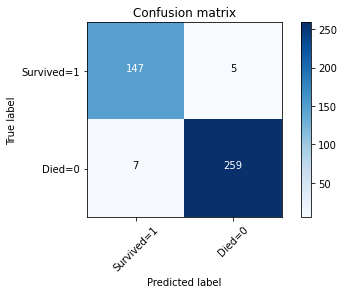

In [ ]:
yhat = predict(Xtest, parameters, L)


from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cnf_matrix = confusion_matrix(Ytest.reshape((418,1)), yhat.reshape((418,1)), labels=[1,0])
np.set_printoptions(precision=2)


 # Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Survived=1','Died=0'],normalize= False,  title='Confusion matrix')

It is apparent that the Adams optimization significantly reduced the number of iterations, by increasing rate of convergence.
However, using a learning rate of 0.01 causes a variance problem.